In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.optimize import curve_fit
from numpy import linalg as LA
%matplotlib inline

# Задание 1



Вычислите производную функции:
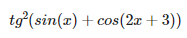
image (1).png

In [ ]:
import sympy as sym

In [ ]:
# определяем аналитические параметры
x=sym.Symbol('x')

In [ ]:
# задаём функцию
def function (x):
  return sym.tan(sym.sin(x)+sym.cos(2*x+3))**2

In [ ]:
# первая производная в точке х=1
sym.diff(function(x),x).evalf(subs={x:1})

55.3859176353379

# Задание 2

Дан объект в 2D пространстве

(-200.0, 200.0)

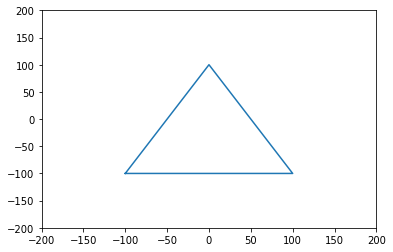

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:

Смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)

Операции преобразования выполняются вместе, так как указаны значения изменения по измерения объекта, соответсвенно, для смещения на (200, 300) можно просто A + [200, 300, 0] или матрица [[1, 0, 200],[0, 1, 300], [0, 0, 0]], а для масштабирования на (0.5, 1.2) поможет [[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]], засчитано.

In [ ]:
# матрица переноса
A1 = [
[1, 0, 200],
[0, 1, 300],
[0, 0, 0],
]

A1 = np.array(A1)

In [ ]:
tt1=A@A1
tt1

array([[  -100,   -100, -50000],
       [     0,    100,  30000],
       [   100,   -100, -10000],
       [  -100,   -100, -50000]])

(-500.0, 500.0)

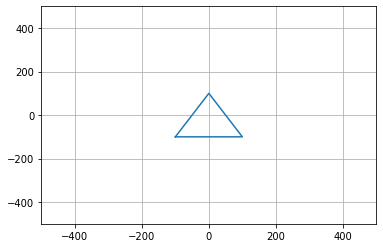

In [ ]:
x = tt1[:,0]
y = tt1[:,1]
plt.plot(x, y)
plt.grid()
plt.ylim([-500, 500])
plt.xlim([-500, 500])


In [ ]:
# матрица масштабирования
A2 = [
[0.5, 0, 0],
[0, 1.2, 0],
[0, 0, 1],
]

A2 = np.array(A2)


In [ ]:
tt2=tt1@A2
tt2

array([[   -50.,   -120., -50000.],
       [     0.,    120.,  30000.],
       [    50.,   -120., -10000.],
       [   -50.,   -120., -50000.]])

(-500.0, 500.0)

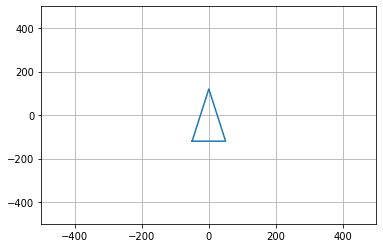

In [ ]:
x = tt2[:,0]
y = tt2[:,1]
plt.plot(x, y)
plt.grid()
plt.ylim([-500, 500])
plt.xlim([-500, 500])

# Задание 3

Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
# находим собственные значения матрицы
np.linalg.eigvals(m)

array([ 3., -1.])

In [ ]:
# находим собственные вектора матрицы (вторая позиция)
np.linalg.eig(m)

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

In [ ]:
# переводим нормализованный вид вектора к удобному виду
res=np.linalg.eig(m)
res1=res[1]
res2=np.transpose(res1)

In [ ]:
res2[0], res2[1]

(array([0.89442719, 0.4472136 ]), array([-0.89442719,  0.4472136 ]))

In [ ]:
# каждый элемент вектора делим на одно из его значений
np.round(res2[0]/0.4472136,0)

array([2., 1.])

In [ ]:
np.round(res2[1]/0.4472136,0)

array([-2.,  1.])

# Задание 4

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

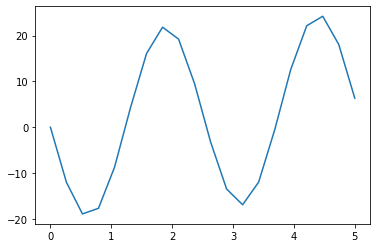

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
x0=np.array([0,0])
res=minimize(error, x0, method='COBYLA', options={'xtol':1e-8, 'disp':True})
res

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:629: OptimizeWarning: Unknown solver options: xtol
  return _minimize_cobyla(fun, x0, args, constraints, **options)


     fun: 0.043631576926070004
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 152
  status: 1
 success: True
       x: array([ 3.0000271 , -2.49993557])

In [ ]:
params, params_covariance = curve_fit(f, x, fx, p0=([3.0000271 , -2.49993557]), method='trf')
a=params[0]
b=params[1]
a,b

(3.0000000005121903, -2.49999999948058)

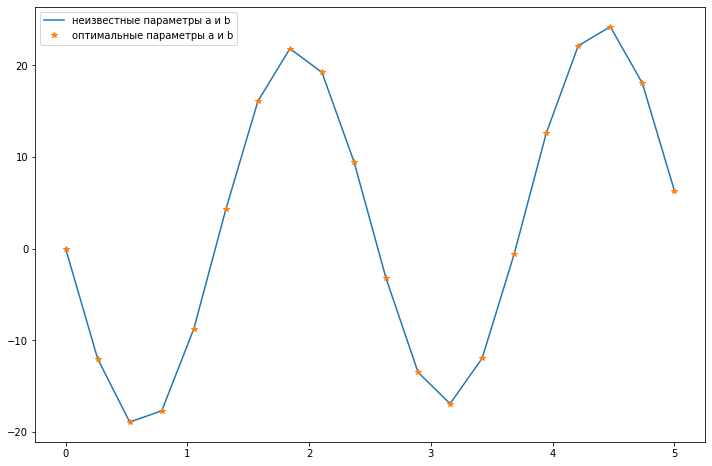

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, label='неизвестные параметры a и b')
plt.plot(x, f(x, a, b), '*', label='оптимальные параметры a и b')
plt.legend()
plt.show()

# Задание 5

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

Подход к решению это формула по которой мы находим косинусную меру np.dot(a, b) / (len_a * len_b), через два цикла, мы можем найти косинусную меру для каждой пары векторов и вывести в качестве результата, пары индекс к индексу, ниже пример реализации:

In [ ]:
def get_cos(a, b):
    len_a = np.linalg.norm(a)
    len_b = np.linalg.norm(b)
    return np.dot(a, b) / (len_a * len_b)

for i in range(len(raitings)):
    target = 0
    for j in range(len(raitings)):
        if i != j:
            cos = get_cos(raitings[i], raitings[j])
            if cos > target:
                target = cos
                user = j
    print(i, user)

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2
